In [1]:
import ROOT, os, sys, glob
from math import *
#ROOT.EnableImplicitMT(4);

Welcome to JupyROOT 6.28/00


In [2]:
list(glob.glob("/eos/cms/store/cmst3/group/l1tr/gpetrucc/dilep-scout/*125X_v0.0.root"))

['/eos/cms/store/cmst3/group/l1tr/gpetrucc/dilep-scout/l1MuNano_BsToMuMu_PU200.125X_v0.0.root',
 '/eos/cms/store/cmst3/group/l1tr/gpetrucc/dilep-scout/l1MuNano_DYToLL_M-10To50_PU200.125X_v0.0.root',
 '/eos/cms/store/cmst3/group/l1tr/gpetrucc/dilep-scout/l1MuNano_DYToLL_M-50_PU200.125X_v0.0.root',
 '/eos/cms/store/cmst3/group/l1tr/gpetrucc/dilep-scout/l1MuNano_HAHM_ZdToMuMu_M15_PU200.125X_v0.0.root',
 '/eos/cms/store/cmst3/group/l1tr/gpetrucc/dilep-scout/l1MuNano_HAHM_ZdToMuMu_M2_PU200.125X_v0.0.root',
 '/eos/cms/store/cmst3/group/l1tr/gpetrucc/dilep-scout/l1MuNano_HAHM_ZdToMuMu_M5_PU200.125X_v0.0.root',
 '/eos/cms/store/cmst3/group/l1tr/gpetrucc/dilep-scout/l1MuNano_JPsiToMuMu_PU200.125X_v0.0.root',
 '/eos/cms/store/cmst3/group/l1tr/gpetrucc/dilep-scout/l1MuNano_SingleNeutrino_PU200.125X_v0.0.root']

In [3]:
rdf = ROOT.RDataFrame("Events","/eos/cms/store/cmst3/group/l1tr/gpetrucc/dilep-scout/l1MuNano_SingleNeutrino_PU200.125X_v0.0.root")

In [4]:
rdf.Describe()

Dataframe from TChain Events in file /eos/cms/store/cmst3/group/l1tr/gpetrucc/dilep-scout/l1MuNano_SingleNeutrino_PU200.125X_v0.0.root

Property                Value
--------                -----
Columns in total           34
Columns from defines        0
Event loops run             0
Processing slots            1

Column          Type                            Origin
------          ----                            ------
GenMu_charge    ROOT::VecOps::RVec<Int_t>       Dataset
GenMu_d0        ROOT::VecOps::RVec<Float_t>     Dataset
GenMu_eta       ROOT::VecOps::RVec<Float_t>     Dataset
GenMu_isFromTau ROOT::VecOps::RVec<Int_t>       Dataset
GenMu_isPrompt  ROOT::VecOps::RVec<Int_t>       Dataset
GenMu_mass      ROOT::VecOps::RVec<Float_t>     Dataset
GenMu_phi       ROOT::VecOps::RVec<Float_t>     Dataset
GenMu_pt        ROOT::VecOps::RVec<Float_t>     Dataset
GenMu_vz        ROOT::VecOps::RVec<Float_t>     Dataset
TkMu_GenMuFlav  ROOT::VecOps::RVec<UChar_t>     Dataset
TkMu_GenMuIdx

Warning in <TClass::Init>: no dictionary for class edm::Hash<1> is available
Warning in <TClass::Init>: no dictionary for class edm::ProcessHistory is available
Warning in <TClass::Init>: no dictionary for class edm::ProcessConfiguration is available
Warning in <TClass::Init>: no dictionary for class edm::ParameterSetBlob is available
Warning in <TClass::Init>: no dictionary for class pair<edm::Hash<1>,edm::ParameterSetBlob> is available


In [5]:
rdf.Display(["TkMu_quality"],20).Print() #this is to display the dataset. this cannot happein wiht the implicitMT on

+-----+--------------+
| Row | TkMu_quality | 
+-----+--------------+
| 0   |              | 
+-----+--------------+
| 1   | 58           | 
|     | 112          | 
+-----+--------------+
| 2   |              | 
+-----+--------------+
| 3   | 186          | 
+-----+--------------+
| 4   | 99           | 
+-----+--------------+
| 5   |              | 
+-----+--------------+
| 6   | 95           | 
+-----+--------------+
| 7   | 64           | 
+-----+--------------+
| 8   | 103          | 
+-----+--------------+
| 9   | 192          | 
|     | 150          | 
+-----+--------------+
| 10  |              | 
+-----+--------------+
| 11  |              | 
+-----+--------------+
| 12  |              | 
+-----+--------------+
| 13  |              | 
+-----+--------------+
| 14  |              | 
+-----+--------------+
| 15  | 61           | 
|     | 64           | 
+-----+--------------+
| 16  | 210          | 
|     | 239          | 
+-----+--------------+
| 17  |              | 
+-----+----

Processed 400000 entries.


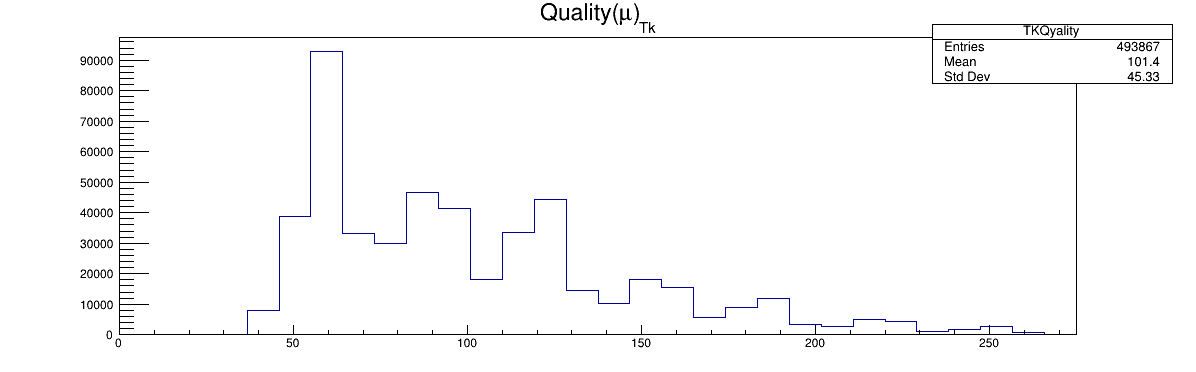

In [6]:
hTkQuality = rdf.Histo1D(("TKQyality","Quality(#mu)_{Tk};",30,0,275),"TkMu_quality")
entries = rdf.Count().GetValue()
print(f"Processed {entries} entries.")
c1 = ROOT.TCanvas("c1","c1",1200,400)
hTkQuality.Draw()
c1.Draw()

Processed 400000 entries.


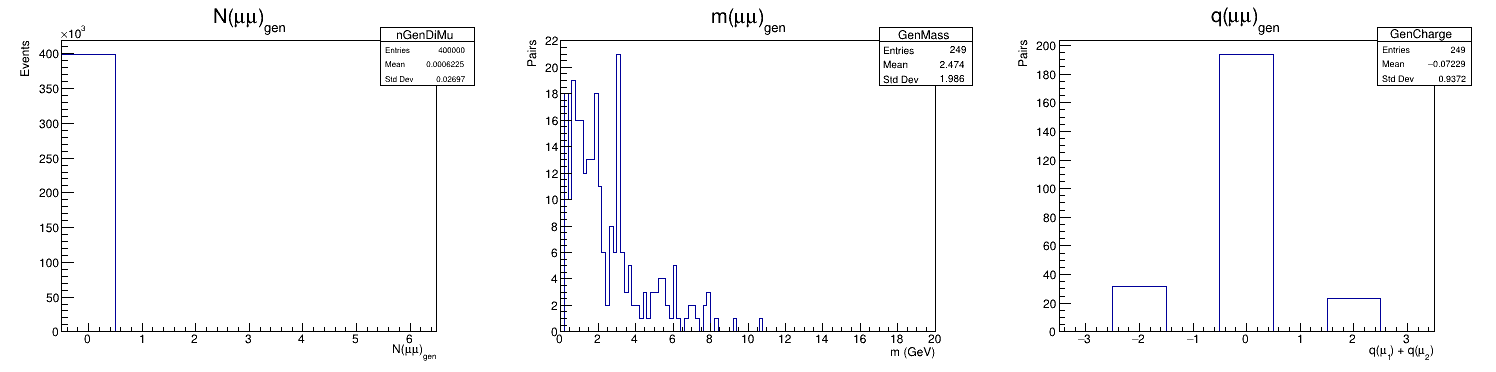

In [7]:
def makeDimuonPairs(name, rdf):
    ## define 4-vectors in cartesian coordinates, for easier 
    rdf = rdf.Define(f"{name}Mu_p4", f"ROOT::VecOps::Construct<ROOT::Math::XYZTVector>(ROOT::VecOps::Construct<ROOT::Math::PtEtaPhiMVector>({name}Mu_pt,{name}Mu_eta,{name}Mu_phi,{name}Mu_mass))")
    #rdf = rdf.Define(f"{name}Mu_p4", f"(ROOT::VecOps::Construct<ROOT::Math::PtEtaPhiMVector>({name}Mu_pt,{name}Mu_eta,{name}Mu_phi,{name}Mu_mass))") this is just he above line bu the conversion of cylindircal co-ordinates to carteshian coordinates hasnt been done and this significantly slows dowon the processing

    ## make indices of all the pairs
    rdf = rdf.Define(f"{name}DiMu_indices", f"""
        std::vector<std::pair<int,int>> ret; 
        for (int i = 0, n = n{name}Mu; i < n; ++i) 
            for (int i2 = i+1; i2 < n; ++i2) 
                ret.emplace_back(i,i2);
        return ret;""") 

    #emplace is used to append a avlue into a set in C++
    # std::vector<std::pair<int,int>> ret;  std is used to define a set in C++
    
    
    
    ## Make the number of dimuons, for convenience later
    rdf = rdf.Define(f"n{name}DiMu", f"{name}DiMu_indices.size()")
    ## compute the mass, charge
    rdf = rdf.Define(f"{name}DiMu_mass", f"""
        ROOT::RVecF ret; 
        for (const auto & pair : {name}DiMu_indices) 
            ret.emplace_back(({name}Mu_p4[pair.first]+{name}Mu_p4[pair.second]).M());
        return ret;""")
    rdf = rdf.Define(f"{name}DiMu_charge", f"""
        ROOT::RVecI ret; 
        for (const auto & pair : {name}DiMu_indices) 
            ret.emplace_back({name}Mu_charge[pair.first]+{name}Mu_charge[pair.second]);
        return ret;""")
    ## compute pt 
#     rdf= rdf.Define(f"{name}DiMu_pt",f"""ROOT::RVecF ret;
#     for (const auto & pair : {name}DiMu_indices) 
#         ret.emplace_back({name}Mu_pt[pair.first]+{name}Mu_pt[pair.second]);
#     return ret;""")
    
    return rdf; #RVecF impies to create a root vector of float type

#what does for(const auto&pair mean)

rdf_gendimu = makeDimuonPairs("Gen", rdf)


## Now we make a plot of the number of generated muons and the ones reconstructed by L1T
hNGenPairs = rdf_gendimu.Histo1D(("nGenDiMu","N(#mu#mu)_{gen};N(#mu#mu)_{gen};Events",7,-0.5,6.5), "nGenDiMu")
hGenPairMass = rdf_gendimu.Histo1D(("GenMass","m(#mu#mu)_{gen};m (GeV);Pairs",100,0.0,20.0), "GenDiMu_mass")
hGenPairCharge = rdf_gendimu.Histo1D(("GenCharge","q(#mu#mu)_{gen};q(#mu_{1}) + q(#mu_{2});Pairs",7,-3.5,3.5), "GenDiMu_charge")
#hGenPairPt = rdf_gendimu.Histo1D(("GenPt","p_{T}(#mu#mu)_{gen};p_{T}(GeV);Pairs",100,-10,60),"GenDiMu_pt")
entries = rdf_gendimu.Count().GetValue()
print(f"Processed {entries} entries.")
## And plot it
c2 = ROOT.TCanvas("c2","c2", 1500, 400)
c2.Divide(3,1)
for i, h in enumerate([hNGenPairs,hGenPairMass,hGenPairCharge]):
    c2.cd(i+1)
    h.Draw()
c2.Draw()

Processed 400000 entries.


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


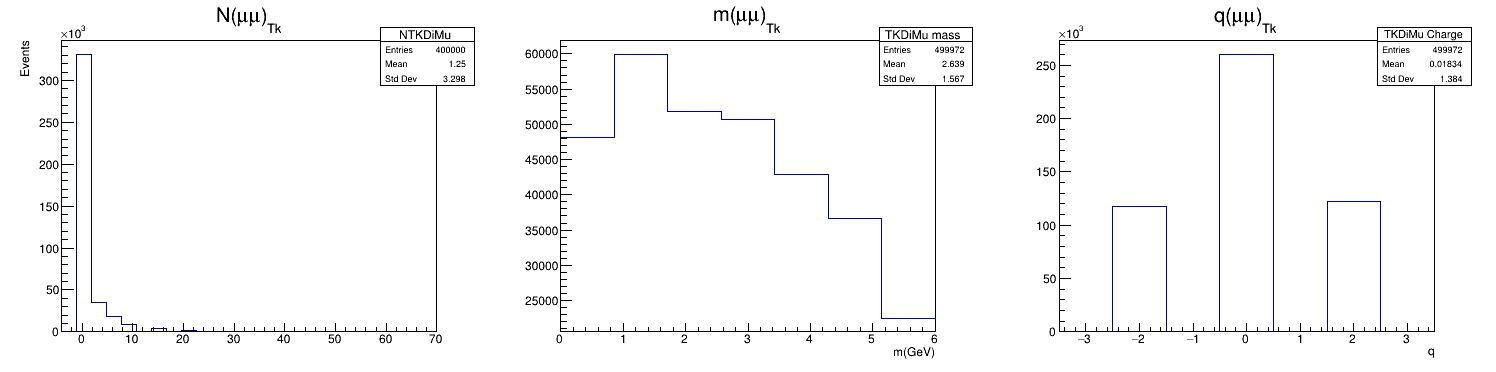

In [8]:
rdf_tkdimu = makeDimuonPairs("Tk", rdf_gendimu)

hNTkPairs = rdf_tkdimu.Histo1D(("NTKDiMu","N(#mu#mu)_{Tk};;Events",25,-4,70),"nTkDiMu")
hTkPairMass = rdf_tkdimu.Histo1D(("TKDiMu mass","m(#mu#mu)_{Tk};m(GeV)",7,0,6),"TkDiMu_mass")
hTkPairCharge = rdf_tkdimu.Histo1D(("TKDiMu Charge","q(#mu#mu)_{Tk};q",7,-3.5,3.5),"TkDiMu_charge")
entries = rdf_tkdimu.Count().GetValue()
print(f"Processed {entries} entries.")
## And plot it
c1 = ROOT.TCanvas("c1","c1", 1500, 400)
c1.Divide(3,1)
for i, h in enumerate([hNTkPairs,hTkPairMass,hTkPairCharge]):
    c1.cd(i+1)
    h.Draw()
c1.Draw()

In [9]:
# #mass is not a good indicator to identify good/bad pairs and therrefore we will atart off with seeing charge of dimuon pairs
# def makegoodpairs(name, rdf):
#     rdf = rdf.Define(f"{name}DiMU_rightind",f"""
#     std::vector<std::pair<int,int>> ret;
#     for(int i = 0, n = n{name}Mu; i < n; ++i)
#         for(int i2 =i+1; i2 < n; ++i2)
#             cout<<i2;
#             ret.emplace_back(i,i2);
#         cout<<i;
#     return ret;""")

# rdf_randomcall = makegoodpairs("Gen", rdf)
# #if({name}Mu_charge)
           